In [1]:
from tensorflow.keras.layers import Input,Conv2D,Dense,MaxPooling2D,Concatenate,Subtract,Add
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

2023-10-25 16:16:15.117064: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2023-10-25 16:16:15.117117: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-10-25 16:16:15.117143: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-10-25 16:16:15.117395: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-25 16:16:15.117780: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


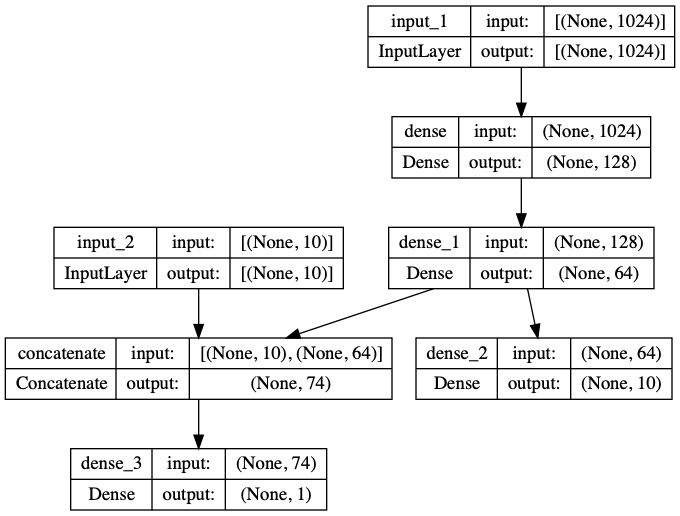

In [3]:
main_input = Input(shape=(1024,))
dense128 = Dense(128) (main_input)
dense64 = Dense(64) (dense128)
aux_input = Input(shape=(10,))
merge = Concatenate()([aux_input,dense64])
aux_output = Dense(10)(dense64)
main_output = Dense(1)(merge)


model1 = Model(inputs=[main_input,aux_input],outputs=[main_output,aux_output])

plot_model(model1, to_file='vbnm.jpg', show_shapes=True)

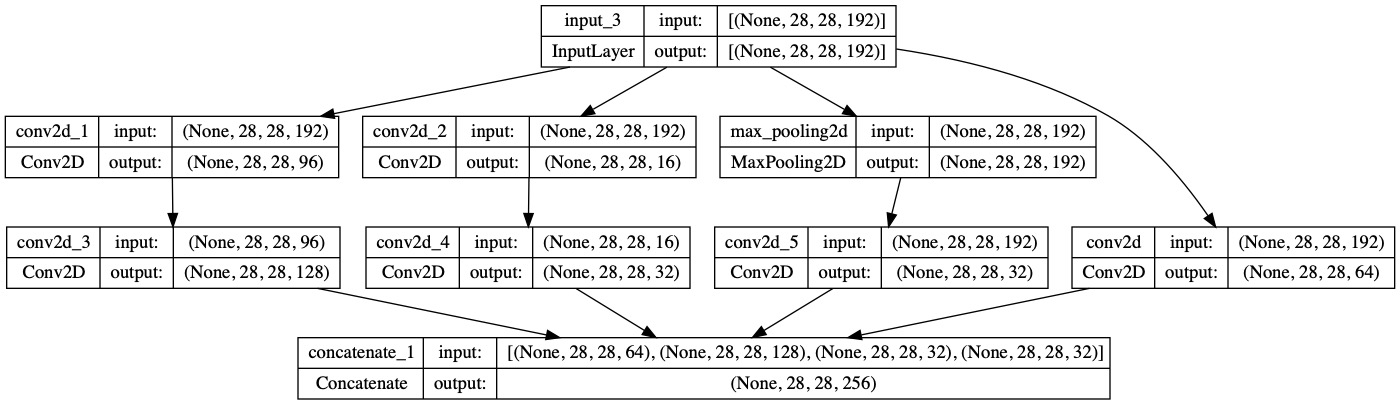

In [5]:
pa = Input(shape=(28,28,192))

conv1 = Conv2D(64, kernel_size=(1,1), padding='same') (pa)
conv2 = Conv2D(96, kernel_size=(1,1), padding='same') (pa)
conv3 = Conv2D(16, kernel_size=(1,1), padding='same') (pa)
maxPool1 = MaxPooling2D((3,3), strides=1, padding='same') (pa)

conv4 = Conv2D(128, kernel_size=(3,3), padding='same') (conv2)
conv5 = Conv2D(32, kernel_size=(5,5), padding='same') (conv3)
conv6 = Conv2D(32,kernel_size=(1,1), padding='same')(maxPool1)

output = Concatenate()([conv1,conv4,conv5,conv6])
model = Model(inputs=[pa],outputs=[output])

plot_model(model,to_file='asdf.jpg',show_shapes=True)

In [6]:
input1 = Input(shape=(32,32,256))
conv1 = Conv2D(64,kernel_size=(1,1),padding='same')(input1)
conv2 = Conv2D(64,kernel_size=(3,3),padding='same')(conv1)
conv3 = Conv2D(256,kernel_size=(1,1),padding='same')(conv2)
output = Add()([input1,conv3])
model1 = Model(inputs=[input1],outputs=[output])

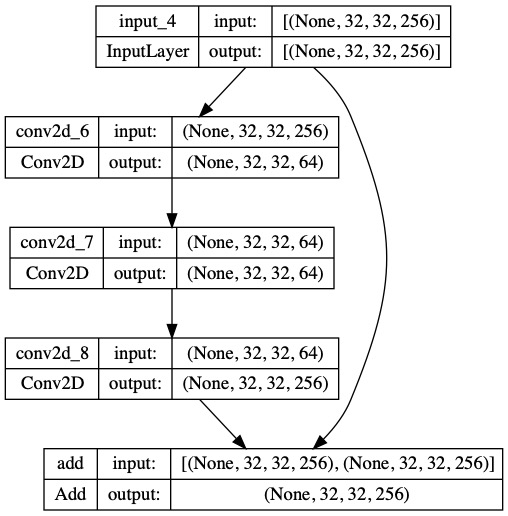

In [8]:
plot_model(model1,to_file='asdf.jpg',show_shapes=True)

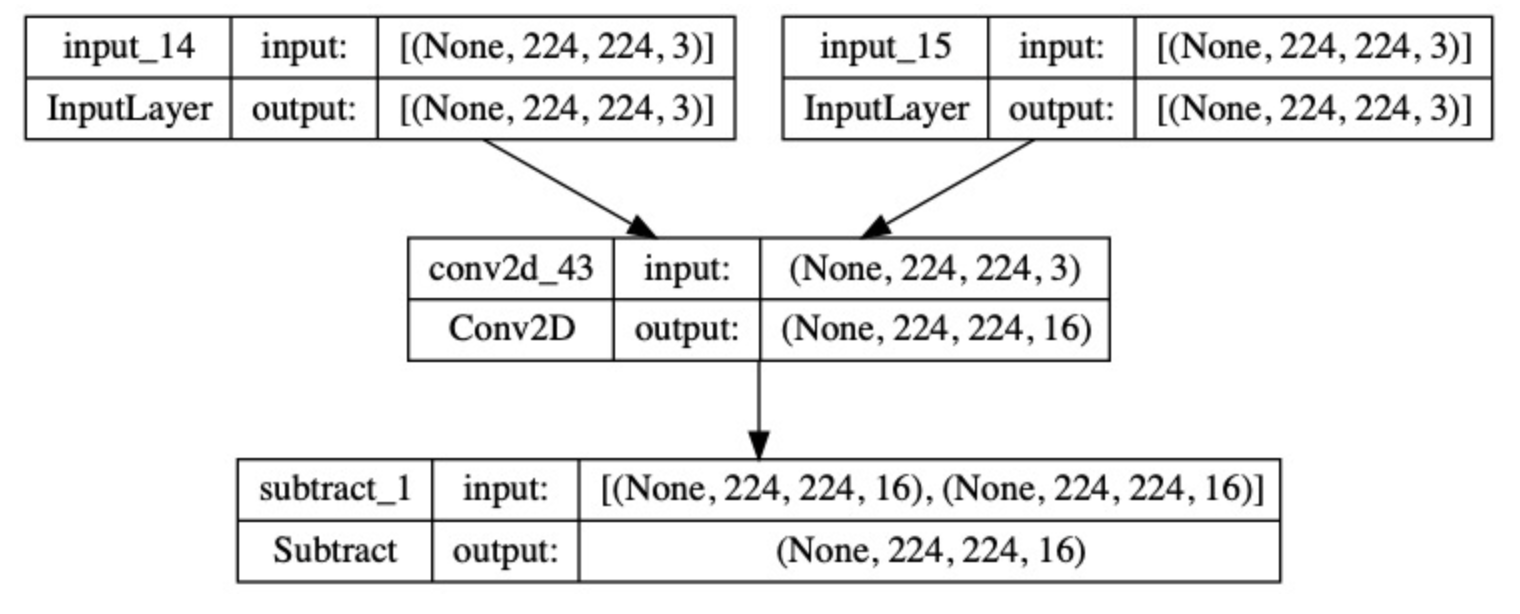

In [9]:
input_a = Input(shape=(224,224,3))
input_b = Input(shape=(224,224,3))
conv = Conv2D(16,kernel_size=(1,1),padding='same')
conv1 = conv(input_a)
conv2 = conv(input_b)
output = Subtract()([conv1,conv2])

model = Model(inputs=[input_a,input_b],outputs=[output])

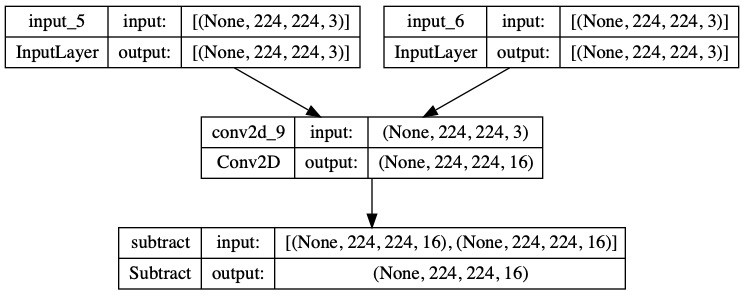

In [11]:
plot_model(model,to_file='asdf.jpg',show_shapes=True)